In [ ]:
from tensorflow.keras.models import load_model
import cv2
import numpy as np

In [ ]:
# Load the saved model
model = load_model('face_recognizer_model.h5')

# Check the model summary (optional)
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,494 (56.64 MB)

 Trainable params: 14,847,492 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step
Predicted Class: khalid, Confidence: 1.00


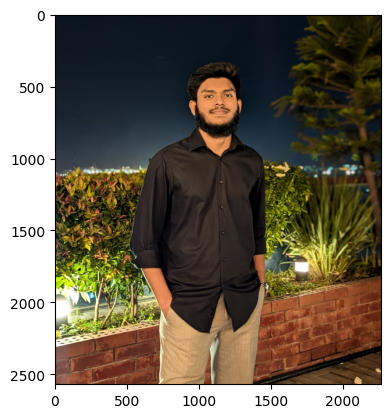

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
class_names = ['ashfaq', 'khalid', 'rifat', 'shafin']

# Load Haarcascade
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Load and prepare the image
test_img = cv2.imread(r'C:\Users\Md. Ashfaq Bin Hoque\Downloads\944 (1).jpg')
test_img_rgb = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)  # Convert to RGB
plt.imshow(test_img_rgb)
gray = cv2.cvtColor(test_img_rgb, cv2.COLOR_RGB2GRAY)  # Convert to grayscale for face detection

# Detect faces
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=4)

if len(faces) > 0:
    # Process the first detected face
    x, y, w, h = faces[0]
    face_img = test_img_rgb[y:y+h, x:x+w]  # Crop face region
    
    # Resize and normalize
    face_resized = cv2.resize(face_img, (256, 256)) / 255.0  # Normalize pixel values
    test_input = face_resized.reshape((1, 256, 256, 3))  # Add batch dimension
    
    # Predict using the model
    prediction = model.predict(test_input)
    predicted_class_index = np.argmax(prediction)
    confidence = prediction[0][predicted_class_index]
    predicted_class_name = class_names[predicted_class_index]
    
    
    print(f"Predicted Class: {predicted_class_name}, Confidence: {confidence:.2f}")
else:
    print("No faces detected.")


In [ ]:



test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB) #converting into rgb
test_img = cv2.resize(test_img, (256, 256))  # Resize to match model input shape
test_img = test_img / 255.0  # Normalize pixel values
test_input = test_img.reshape((1, 256, 256, 3))  # Add batch dimension

np.argmax(model.predict(test_input))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


np.int64(2)

In [ ]:
import cv2
import numpy as np

# Load Haarcascade
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
class_names = ['ashfaq', 'khalid', 'rifat', 'shafin']

# Initialize webcam
cap = cv2.VideoCapture(0)

#set threshold
threshold = 0.99

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Detect faces
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    
    for (x, y, w, h) in faces:
        # Draw rectangle around the face
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
        
        # Preprocess face for prediction
        face = frame[y:y+h, x:x+w]
        face_rgb = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
        face_resized = cv2.resize(face_rgb, (256, 256))  # Resize to match the model's input size
        face_array = np.expand_dims(face_resized, axis=0) / 255.0  # Normalize
        
        # Make prediction
        prediction = model.predict(face_array)
        predicted_class_index = np.argmax(prediction)
        confidence = prediction[0][predicted_class_index]
        # Display prediction
        if confidence >= threshold:
            predicted_class_name = class_names[predicted_class_index]
        else:
            predicted_class_name = "Unknown"
        
        label = f"Name: {predicted_class_name}"
        cv2.putText(frame, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
    
    # Display the frame
    cv2.imshow('Webcam', frame)
    
    # Break the loop with 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and close the window
cap.release()
cv2.destroyAllWindows()


NameError: name 'model' is not defined